## Mitsiu Alejandro Carreño Sarabia - E23S-18014

- Genera datos de clasificación (alrededor de 1000)
- Realiza entrenamientos con distintas combinaciones de optimizadores y funciones de perdida
- Compara entre unas y otras, da tus observaciones y teorías.
- Compara accuracy, velocidad de convergencia, resistencia a ruido.
- Deja tus resultados y comentarios en un cuaderno de colab. 

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

### Generamos datos ficticios para entrenar clasificador

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features = 2,
    n_informative = 2,
    n_redundant = 0,
    n_clusters_per_class=1
)

### Gráficar dataset completo

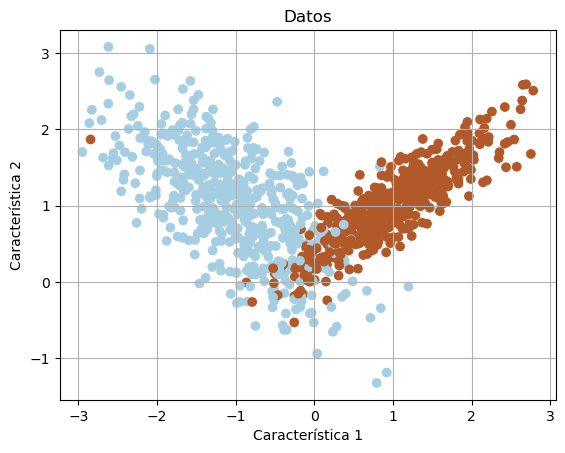

In [3]:
def Graph(x1, x2, y, title="Datos"):
    plt.scatter(x1, x2, c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.grid()
    plt.show()

Graph(X[:,0], X[:,1], y)

### Normalizar datos

0.0
1.0
(1000, 2)


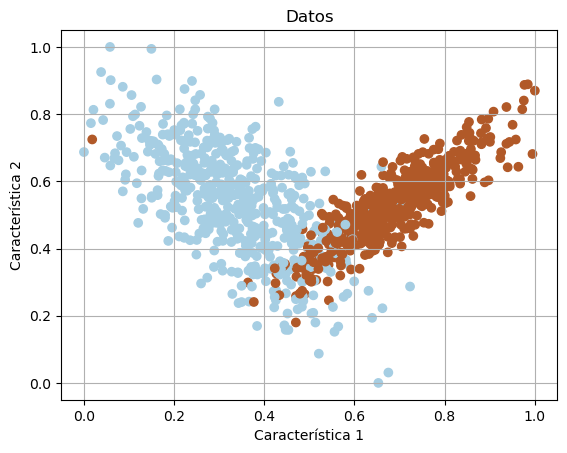

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler().fit(X)
x_normalized = scaler_minmax.transform(X)
print(x_normalized.min())
print(x_normalized.max())
print(x_normalized.shape)

Graph(x_normalized[:,0], x_normalized[:,1], y)

### Generar dataset de training y test

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.30)

print(x_train.shape)
print(x_test.shape)

(700, 2)
(300, 2)


### Funciones de activación

In [6]:
import tensorflow as tf
from tensorflow.keras.activations import elu, exponential, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softmax, softplus, softsign, swish, tanh

2023-09-08 18:44:19.977179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 18:44:20.077035: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-08 18:44:20.078748: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-08 18:44:22.033858: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


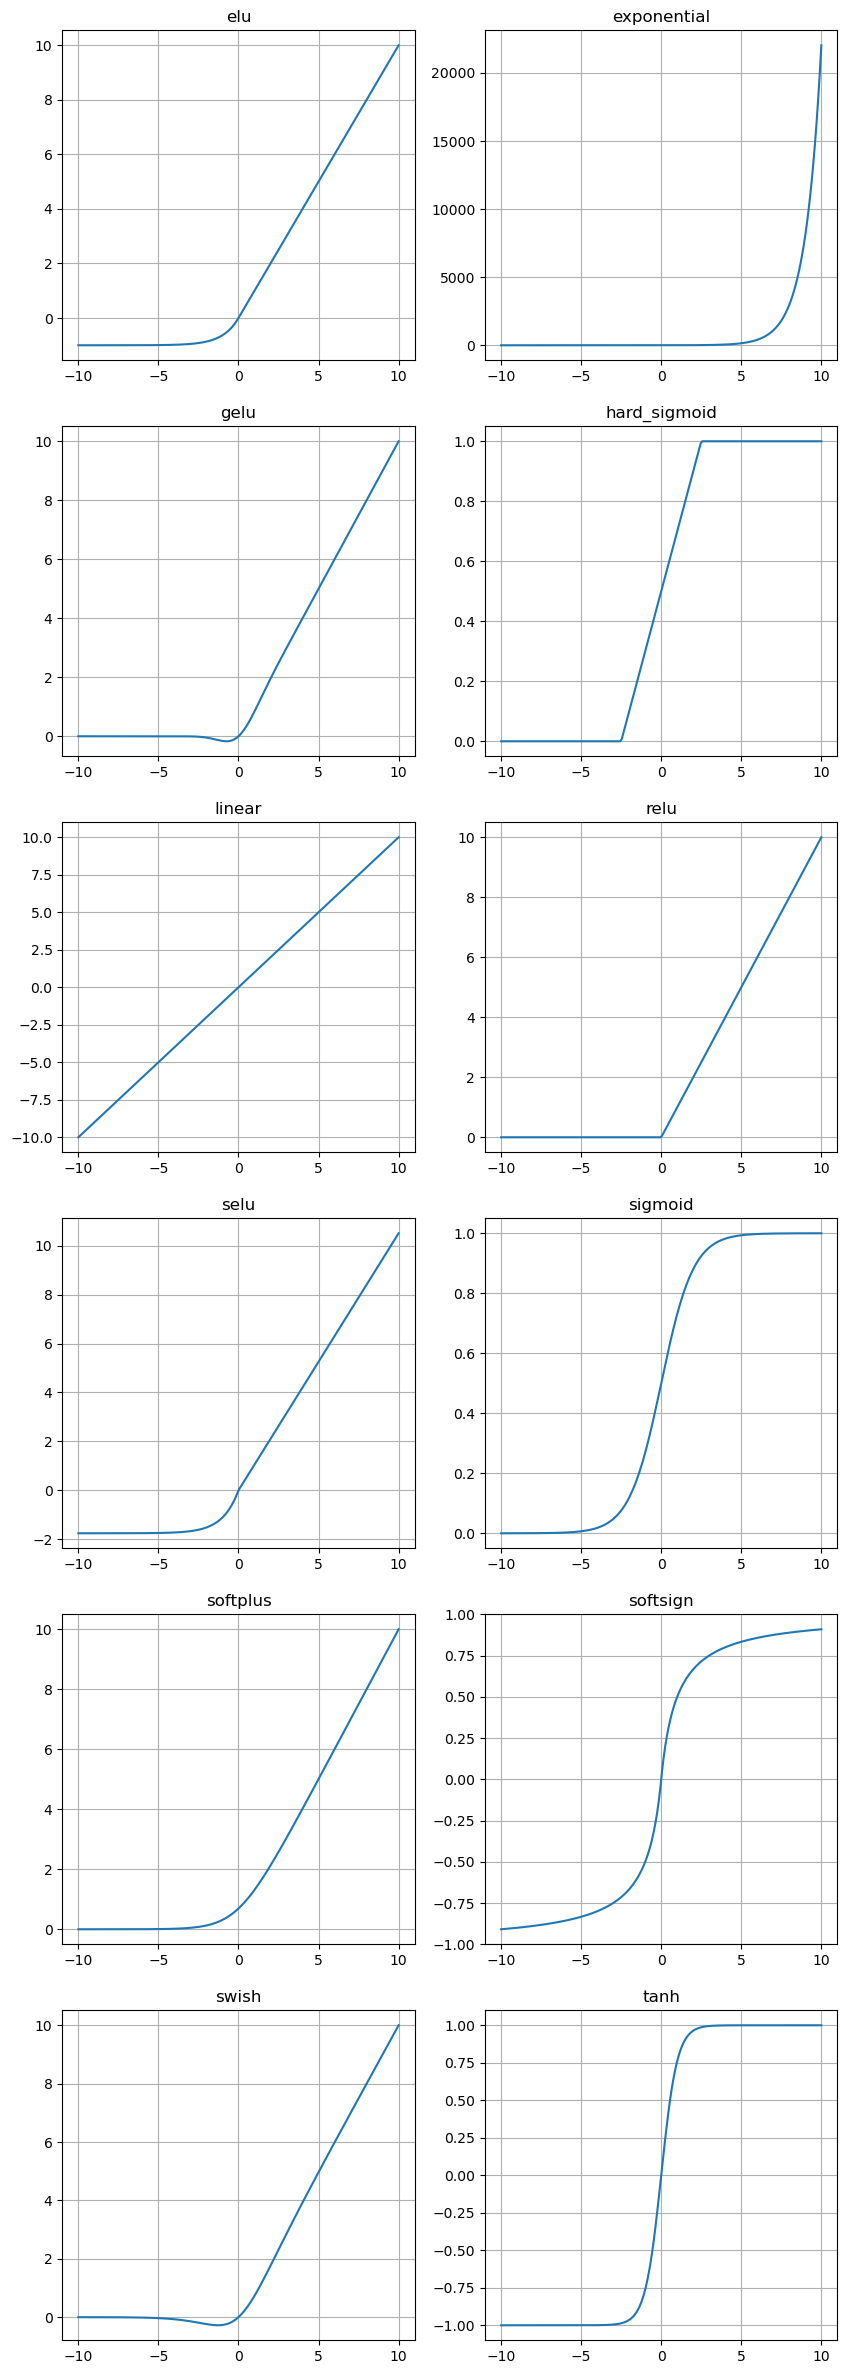

In [7]:
x_sample = tf.constant(np.linspace(-10, 10, 200))
activaciones = [elu, exponential, gelu, hard_sigmoid, linear, relu, selu, sigmoid, softplus, softsign, swish, tanh]

plt.figure(figsize=(10, 30))
for i, funcion in enumerate(activaciones):
    plt.subplot(6, 2, i+1)
    plt.plot(x_sample, funcion(x_sample), label=funcion.__name__)
    plt.title(funcion.__name__)
    plt.grid()
    

### Optimizador

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

### Función de pérdida

In [9]:
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Comparación de modelos

- Activación: Hard sigmoid
- Perdida: Mean squared error
- Optimizer: Adam

Resultados:
- Perdida: 0.0777
- Precisión (train): 0.9071
- Precisión (test): 0.9566


In [10]:
modelo = Sequential()
modelo.add(Dense(units=1, activation="hard_sigmoid", input_shape=(2,)))
modelo.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [11]:
modelo.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
22/22 [==============================] - 1s 5ms/step - loss: 0.2682 - accuracy: 0.5129
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2671 - accuracy: 0.5114
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.5043
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2653 - accuracy: 0.5014
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2645 - accuracy: 0.4914
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2637 - accuracy: 0.4757
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.4671
Epoch 8/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2622 - accuracy: 0.4600
Epoch 9/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2616 - accuracy: 0.4214
Epoch 10/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.4029

22/22 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.8757
Epoch 83/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.8729
Epoch 84/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2195 - accuracy: 0.8743
Epoch 85/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2190 - accuracy: 0.8771
Epoch 86/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2185 - accuracy: 0.8771
Epoch 87/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2180 - accuracy: 0.8771
Epoch 88/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.8771
Epoch 89/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2170 - accuracy: 0.8771
Epoch 90/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2165 - accuracy: 0.8771
Epoch 91/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.2160 - accuracy: 0.8771
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.1833 - accuracy: 0.8957
Epoch 163/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1829 - accuracy: 0.8957
Epoch 164/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.8971
Epoch 165/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.8957
Epoch 166/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1816 - accuracy: 0.8957
Epoch 167/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1812 - accuracy: 0.8957
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1808 - accuracy: 0.8971
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.8957
Epoch 170/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1800 - accuracy: 0.8957
Epoch 171/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1796 - accuracy: 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.1539 - accuracy: 0.9000
Epoch 243/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1536 - accuracy: 0.9000
Epoch 244/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1533 - accuracy: 0.9000
Epoch 245/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1530 - accuracy: 0.9000
Epoch 246/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1526 - accuracy: 0.9000
Epoch 247/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1523 - accuracy: 0.9000
Epoch 248/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1520 - accuracy: 0.9000
Epoch 249/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1517 - accuracy: 0.9000
Epoch 250/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.9000
Epoch 251/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1511 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.1319 - accuracy: 0.9043
Epoch 323/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1316 - accuracy: 0.9043
Epoch 324/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1314 - accuracy: 0.9043
Epoch 325/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9043
Epoch 326/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.1309 - accuracy: 0.9043
Epoch 327/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1307 - accuracy: 0.9043
Epoch 328/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.9043
Epoch 329/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.9043
Epoch 330/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1300 - accuracy: 0.9043
Epoch 331/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.9057
Epoch 403/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9057
Epoch 404/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9057
Epoch 405/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9071
Epoch 406/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 0.9057
Epoch 407/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.9071
Epoch 408/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1143 - accuracy: 0.9071
Epoch 409/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1141 - accuracy: 0.9057
Epoch 410/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1139 - accuracy: 0.9057
Epoch 411/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.9086
Epoch 483/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9086
Epoch 484/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9086
Epoch 485/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9086
Epoch 486/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.9086
Epoch 487/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1031 - accuracy: 0.9086
Epoch 488/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9086
Epoch 489/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9086
Epoch 490/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.9086
Epoch 491/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.1026 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9114
Epoch 563/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0956 - accuracy: 0.9129
Epoch 564/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9129
Epoch 565/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.9129
Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0953 - accuracy: 0.9129
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9129
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0952 - accuracy: 0.9129
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9129
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9129
Epoch 571/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0900 - accuracy: 0.9114
Epoch 643/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9114
Epoch 644/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9114
Epoch 645/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0898 - accuracy: 0.9114
Epoch 646/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9114
Epoch 647/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.9114
Epoch 648/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9114
Epoch 649/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9114
Epoch 650/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9114
Epoch 651/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9114
Epoch 723/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9114
Epoch 724/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9100
Epoch 725/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0858 - accuracy: 0.9114
Epoch 726/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9129
Epoch 727/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0857 - accuracy: 0.9114
Epoch 728/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9114
Epoch 729/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9114
Epoch 730/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9114
Epoch 731/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0828 - accuracy: 0.9086
Epoch 803/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0828 - accuracy: 0.9086
Epoch 804/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9086
Epoch 805/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.9086
Epoch 806/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9086
Epoch 807/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9086
Epoch 808/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9071
Epoch 809/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.9071
Epoch 810/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.9071
Epoch 811/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9057
Epoch 883/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9057
Epoch 884/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9057
Epoch 885/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9057
Epoch 886/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9057
Epoch 887/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9057
Epoch 888/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9057
Epoch 889/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9057
Epoch 890/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.9071
Epoch 891/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0802 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9057
Epoch 963/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9057
Epoch 964/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9071
Epoch 965/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0785 - accuracy: 0.9057
Epoch 966/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9057
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9057
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9071
Epoch 969/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9057
Epoch 970/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.9071
Epoch 971/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.0783 - accuracy: 0.

In [12]:
y_predict = modelo.predict(x_test)
round_y_predict = np.round(y_predict)

10/10 [==============================] - 0s 3ms/step


In [13]:
import sklearn
test_acc = sklearn.metrics.accuracy_score(y_test, round_y_predict)

In [14]:
n_misses = (1-test_acc)*y_test.shape[0]
print(f"Precisión test: {test_acc}\nMuestras mal clasificadas: {round(n_misses)}")

Precisión test: 0.9566666666666667
Muestras mal clasificadas: 13


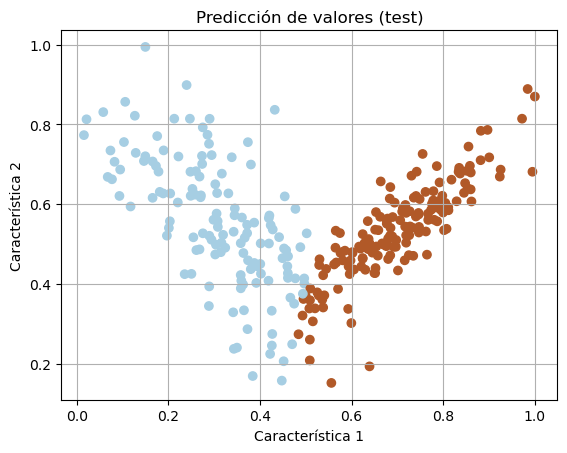

In [15]:
Graph(x_test[:,0], x_test[:,1], round_y_predict, "Predicción de valores (test)")

- Activación: Sigmoid
- Perdida: Binary Cross-entropy
- Optimizer: SGD

Resultados:
- Perdida: 0.3304
- Precisión (train): 0.9086
- Precisión (test): 0.96


In [16]:
modelo = Sequential()
modelo.add(Dense(units=1, activation="sigmoid", input_shape=(2,)))
modelo.compile(optimizer="SGD", loss="binary_crossentropy", metrics=['accuracy'])

In [17]:
modelo.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
22/22 [==============================] - 1s 4ms/step - loss: 0.8704 - accuracy: 0.5143
Epoch 2/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8551 - accuracy: 0.5143
Epoch 3/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8418 - accuracy: 0.5143
Epoch 4/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8301 - accuracy: 0.5143
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8197 - accuracy: 0.5143
Epoch 6/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.5143
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8027 - accuracy: 0.5143
Epoch 8/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7956 - accuracy: 0.5129
Epoch 9/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7894 - accuracy: 0.5143
Epoch 10/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.7838 - accuracy: 0.5057

22/22 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.7771
Epoch 83/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.7814
Epoch 84/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6603 - accuracy: 0.7843
Epoch 85/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6591 - accuracy: 0.7857
Epoch 86/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.7929
Epoch 87/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.7929
Epoch 88/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6557 - accuracy: 0.7929
Epoch 89/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6545 - accuracy: 0.8014
Epoch 90/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.8000
Epoch 91/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.8057
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.5823 - accuracy: 0.8829
Epoch 163/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.8814
Epoch 164/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5806 - accuracy: 0.8857
Epoch 165/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 0.8829
Epoch 166/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5789 - accuracy: 0.8871
Epoch 167/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5780 - accuracy: 0.8871
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5772 - accuracy: 0.8900
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.8900
Epoch 170/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.5755 - accuracy: 0.8900
Epoch 171/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.8971
Epoch 243/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5231 - accuracy: 0.8986
Epoch 244/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5224 - accuracy: 0.8986
Epoch 245/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.8971
Epoch 246/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.8957
Epoch 247/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.8986
Epoch 248/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.8971
Epoch 249/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.8971
Epoch 250/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5187 - accuracy: 0.8986
Epoch 251/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.4799 - accuracy: 0.9043
Epoch 323/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.9043
Epoch 324/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.9043
Epoch 325/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.9043
Epoch 326/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.9029
Epoch 327/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4776 - accuracy: 0.9043
Epoch 328/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.9043
Epoch 329/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.9043
Epoch 330/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.9043
Epoch 331/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4757 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.4463 - accuracy: 0.9057
Epoch 403/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.9057
Epoch 404/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.9086
Epoch 405/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4453 - accuracy: 0.9071
Epoch 406/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.9057
Epoch 407/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4445 - accuracy: 0.9071
Epoch 408/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.9057
Epoch 409/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4438 - accuracy: 0.9086
Epoch 410/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.9086
Epoch 411/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4431 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.4199 - accuracy: 0.9086
Epoch 483/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4196 - accuracy: 0.9086
Epoch 484/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.9086
Epoch 485/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4190 - accuracy: 0.9100
Epoch 486/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4187 - accuracy: 0.9114
Epoch 487/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4184 - accuracy: 0.9114
Epoch 488/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4182 - accuracy: 0.9114
Epoch 489/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.9086
Epoch 490/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4176 - accuracy: 0.9086
Epoch 491/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4173 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3986 - accuracy: 0.9114
Epoch 563/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3984 - accuracy: 0.9114
Epoch 564/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.9114
Epoch 565/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.9114
Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3976 - accuracy: 0.9114
Epoch 567/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.9114
Epoch 568/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.9129
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3969 - accuracy: 0.9129
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.9114
Epoch 571/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3964 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3811 - accuracy: 0.9100
Epoch 643/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.9100
Epoch 644/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3807 - accuracy: 0.9100
Epoch 645/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3805 - accuracy: 0.9100
Epoch 646/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.9100
Epoch 647/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.9100
Epoch 648/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3799 - accuracy: 0.9100
Epoch 649/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.9100
Epoch 650/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3795 - accuracy: 0.9100
Epoch 651/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3793 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3665 - accuracy: 0.9086
Epoch 723/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3663 - accuracy: 0.9100
Epoch 724/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3661 - accuracy: 0.9086
Epoch 725/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3660 - accuracy: 0.9086
Epoch 726/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3658 - accuracy: 0.9100
Epoch 727/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.9086
Epoch 728/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3655 - accuracy: 0.9086
Epoch 729/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.9086
Epoch 730/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3652 - accuracy: 0.9086
Epoch 731/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3541 - accuracy: 0.9114
Epoch 803/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.9114
Epoch 804/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.9114
Epoch 805/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.9114
Epoch 806/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3535 - accuracy: 0.9114
Epoch 807/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3534 - accuracy: 0.9114
Epoch 808/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.9114
Epoch 809/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.9114
Epoch 810/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9114
Epoch 811/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3528 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3435 - accuracy: 0.9086
Epoch 883/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3434 - accuracy: 0.9086
Epoch 884/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3433 - accuracy: 0.9086
Epoch 885/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.9086
Epoch 886/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.9086
Epoch 887/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3429 - accuracy: 0.9086
Epoch 888/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3428 - accuracy: 0.9086
Epoch 889/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3427 - accuracy: 0.9086
Epoch 890/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3425 - accuracy: 0.9086
Epoch 891/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.3343 - accuracy: 0.9086
Epoch 963/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3342 - accuracy: 0.9086
Epoch 964/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.9086
Epoch 965/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3340 - accuracy: 0.9086
Epoch 966/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3339 - accuracy: 0.9086
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3338 - accuracy: 0.9086
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.9086
Epoch 969/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.9086
Epoch 970/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.9086
Epoch 971/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3334 - accuracy: 0.

In [18]:
y_predict = modelo.predict(x_test)
round_y_predict = np.round(y_predict)

10/10 [==============================] - 0s 3ms/step


In [19]:
test_acc = sklearn.metrics.accuracy_score(y_test, round_y_predict)

In [20]:
n_misses = (1-test_acc)*y_test.shape[0]
print(f"Precisión test: {test_acc}\nMuestras mal clasificadas: {round(n_misses)}")

Precisión test: 0.96
Muestras mal clasificadas: 12


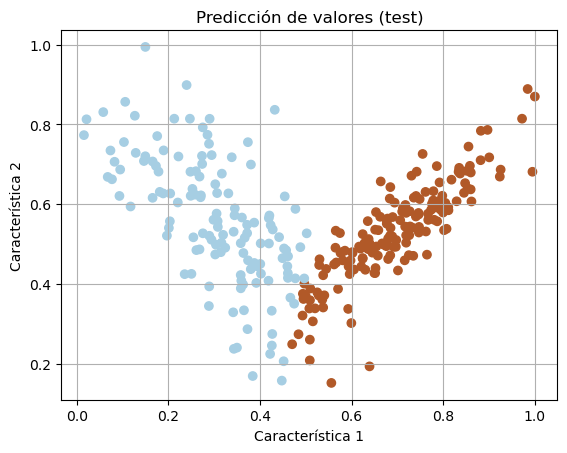

In [21]:
Graph(x_test[:,0], x_test[:,1], round_y_predict, "Predicción de valores (test)")

- Activación: Exponential
- Perdida: Binary Cross-Entropy
- Optimizer: Adagrad

Resultados:
- Perdida: 0.8254
- Precisión (train): 0.2957
- Precisión (test): 0.2266


In [22]:
modelo = Sequential()
modelo.add(Dense(units=1, activation="exponential", input_shape=(2,)))
modelo.compile(optimizer="Adagrad", loss="binary_crossentropy", metrics=['accuracy'])

In [23]:
modelo.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
22/22 [==============================] - 1s 5ms/step - loss: 0.8718 - accuracy: 0.2029
Epoch 2/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8709 - accuracy: 0.2029
Epoch 3/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8703 - accuracy: 0.2043
Epoch 4/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8698 - accuracy: 0.2043
Epoch 5/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8694 - accuracy: 0.2043
Epoch 6/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8690 - accuracy: 0.2043
Epoch 7/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8687 - accuracy: 0.2057
Epoch 8/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8684 - accuracy: 0.2057
Epoch 9/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8681 - accuracy: 0.2057
Epoch 10/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8678 - accuracy: 0.2071

22/22 [==============================] - 0s 4ms/step - loss: 0.8582 - accuracy: 0.2357
Epoch 83/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8581 - accuracy: 0.2357
Epoch 84/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8580 - accuracy: 0.2357
Epoch 85/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8579 - accuracy: 0.2357
Epoch 86/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8578 - accuracy: 0.2371
Epoch 87/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8577 - accuracy: 0.2371
Epoch 88/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.2400
Epoch 89/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8576 - accuracy: 0.2400
Epoch 90/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8575 - accuracy: 0.2400
Epoch 91/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8574 - accuracy: 0.2400
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.8525 - accuracy: 0.2500
Epoch 163/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8525 - accuracy: 0.2500
Epoch 164/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8524 - accuracy: 0.2500
Epoch 165/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8524 - accuracy: 0.2514
Epoch 166/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8523 - accuracy: 0.2514
Epoch 167/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8522 - accuracy: 0.2514
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8522 - accuracy: 0.2514
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.2529
Epoch 170/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8521 - accuracy: 0.2529
Epoch 171/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8520 - accuracy: 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.8483 - accuracy: 0.2643
Epoch 243/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8483 - accuracy: 0.2643
Epoch 244/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8482 - accuracy: 0.2643
Epoch 245/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8482 - accuracy: 0.2643
Epoch 246/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8481 - accuracy: 0.2657
Epoch 247/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8481 - accuracy: 0.2657
Epoch 248/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8480 - accuracy: 0.2643
Epoch 249/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8480 - accuracy: 0.2643
Epoch 250/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8479 - accuracy: 0.2643
Epoch 251/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8479 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.2714
Epoch 323/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8448 - accuracy: 0.2714
Epoch 324/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.2714
Epoch 325/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8447 - accuracy: 0.2714
Epoch 326/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8447 - accuracy: 0.2714
Epoch 327/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.2729
Epoch 328/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.2729
Epoch 329/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8445 - accuracy: 0.2714
Epoch 330/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8445 - accuracy: 0.2729
Epoch 331/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8445 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8418 - accuracy: 0.2786
Epoch 403/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8417 - accuracy: 0.2786
Epoch 404/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8417 - accuracy: 0.2786
Epoch 405/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8417 - accuracy: 0.2786
Epoch 406/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8416 - accuracy: 0.2786
Epoch 407/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8416 - accuracy: 0.2786
Epoch 408/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8416 - accuracy: 0.2786
Epoch 409/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8415 - accuracy: 0.2786
Epoch 410/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8415 - accuracy: 0.2800
Epoch 411/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8415 - accuracy: 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.8390 - accuracy: 0.2800
Epoch 483/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8390 - accuracy: 0.2800
Epoch 484/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8390 - accuracy: 0.2800
Epoch 485/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8389 - accuracy: 0.2800
Epoch 486/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8389 - accuracy: 0.2800
Epoch 487/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8389 - accuracy: 0.2800
Epoch 488/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8388 - accuracy: 0.2800
Epoch 489/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8388 - accuracy: 0.2800
Epoch 490/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8388 - accuracy: 0.2800
Epoch 491/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8387 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.2843
Epoch 563/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.2843
Epoch 564/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.2843
Epoch 565/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8365 - accuracy: 0.2843
Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.2829
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.2829
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.2829
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.2829
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.2829
Epoch 571/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8342 - accuracy: 0.2843
Epoch 643/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8342 - accuracy: 0.2843
Epoch 644/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8342 - accuracy: 0.2843
Epoch 645/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8341 - accuracy: 0.2843
Epoch 646/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.2843
Epoch 647/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.2857
Epoch 648/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8341 - accuracy: 0.2843
Epoch 649/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8340 - accuracy: 0.2843
Epoch 650/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8340 - accuracy: 0.2843
Epoch 651/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8340 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8321 - accuracy: 0.2871
Epoch 723/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8320 - accuracy: 0.2871
Epoch 724/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8320 - accuracy: 0.2871
Epoch 725/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8320 - accuracy: 0.2871
Epoch 726/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8320 - accuracy: 0.2871
Epoch 727/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8319 - accuracy: 0.2871
Epoch 728/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8319 - accuracy: 0.2871
Epoch 729/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8319 - accuracy: 0.2871
Epoch 730/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8319 - accuracy: 0.2871
Epoch 731/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8318 - accuracy: 0.

22/22 [==============================] - 0s 4ms/step - loss: 0.8300 - accuracy: 0.2914
Epoch 803/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8300 - accuracy: 0.2914
Epoch 804/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.2914
Epoch 805/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8300 - accuracy: 0.2914
Epoch 806/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.2914
Epoch 807/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.2914
Epoch 808/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.2914
Epoch 809/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.2914
Epoch 810/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8298 - accuracy: 0.2914
Epoch 811/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8298 - accuracy: 0.

22/22 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.2929
Epoch 883/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.8281 - accuracy: 0.2929
Epoch 884/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.2929
Epoch 885/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.2929
Epoch 886/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.2929
Epoch 887/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.2929
Epoch 888/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8280 - accuracy: 0.2929
Epoch 889/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.2929
Epoch 890/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.2929
Epoch 891/1000
22/22 [==============================] - 0s 2ms/step - loss: 0.8279 - accuracy: 0.

22/22 [==============================] - 0s 5ms/step - loss: 0.8263 - accuracy: 0.2943
Epoch 963/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.2943
Epoch 964/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.2943
Epoch 965/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.8262 - accuracy: 0.2943
Epoch 966/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8262 - accuracy: 0.2943
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.2943
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.2943
Epoch 969/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.2943
Epoch 970/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.2943
Epoch 971/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.8261 - accuracy: 0.

In [24]:
y_predict = modelo.predict(x_test)
round_y_predict = np.round(y_predict)

10/10 [==============================] - 0s 3ms/step


In [25]:
test_acc = sklearn.metrics.accuracy_score(y_test, round_y_predict)

In [26]:
n_misses = (1-test_acc)*y_test.shape[0]
print(f"Precisión test: {test_acc}\nMuestras mal clasificadas: {round(n_misses)}")

Precisión test: 0.22666666666666666
Muestras mal clasificadas: 232


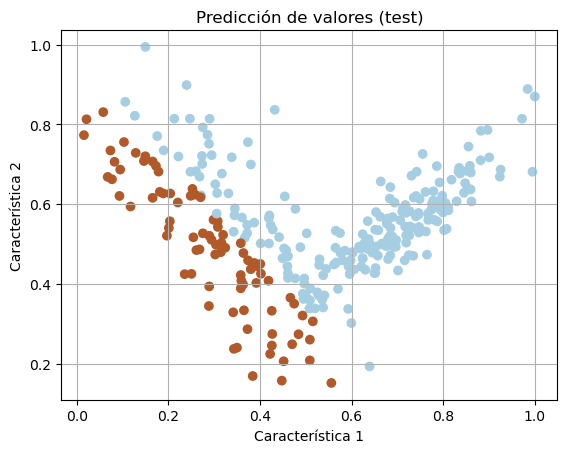

In [27]:
Graph(x_test[:,0], x_test[:,1], round_y_predict, "Predicción de valores (test)")

### Resultados
Claramente se puede observar que al elegir una activación exponencial para esté dataset se genera una clasificación muy alejada de los valores reales, incluso obteniendo precisiones que rondan un 25% de precisión. En cambio las combinaciones Hard sigmoid / Mean Squared Error / Adam y Sigmoid / Binary Cross-Entropy / SGD dieron resultados muy similares (rondando el 90% de precisión en train y alcanzando hasta el 95% en test), esto lo atribuyo principalmente a que las funciones sigmoid permiten una clasificación dicotómica, que se ajusta completamente a los datos empleados.     
En todos los modelos, sin importar la función de activación, pérdida u optimización, durante los últimos epochs cuando parecía que se había alcanzado el límite de precisión, la pérdida seguía disminuyendo (aunque fuera a ritmo muy lento) y viceversa, es decir, cuando parecía que “loss” o “accuracy” había alcanzado su mínimo/máximo, el otro lograba mejorar minusculamente y realmente técnicamente nunca alcanzó la convergencia, siempre seguía mejorando aunque fuera muy poco dentro de los 1000 epochs, lo cuál me pareció un fenómeno destacable dado que esperaba que a partir de cierto epoch los valores dejarán de cambiar, supongo que va relacionado con la tasas de aprendizaje.
